# Master Thesis

# Import all the relevant packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC
from sklearn.utils import resample
from pandas.plotting import table 
import warnings
warnings.filterwarnings("ignore")

# Import German Credit Dataset

In [4]:
file = "s3://aws-thesis-data/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'pre_employmentsince', 'installmentrate', 'status_sex', 'otherdebtors',
         'pre_residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# Data Exploration

## Glimpse on dataset

In [5]:
germany = pd.read_csv(file,names = names, delimiter=' ')
print(germany.shape)
print (germany.columns)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'pre_employmentsince', 'installmentrate',
       'status_sex', 'otherdebtors', 'pre_residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


In [6]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   pre_employmentsince    1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   status_sex             1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  pre_residencesince     1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

- Observations: 1000 rows and 15 features, object (string) and integer, no null values


In [7]:
germany.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Modify classification column into the binary: 2 -> 1= bad , 1 -> 0 = good

In [8]:
germany.classification.replace([1,2], [0,1], inplace=True)

# Data Transformation

## One Hot Encoding - Categorical Features

In [10]:
categorical_variables = names = ['existingchecking', 'credithistory', 'purpose',
         'savings','pre_employmentsince', 'status_sex', 'otherdebtors',
         'property', 'otherinstallmentplans', 'housing',
         'job', 'telephone', 'foreignworker']

In [11]:
d = defaultdict(LabelEncoder)

In [12]:
labelencode = germany[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

for x in range(len(categorical_variables)):
    print(categorical_variables[x], ": ", germany[categorical_variables[x]].unique())
    print(categorical_variables[x], ": ", labelencode[categorical_variables[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
pre_employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
pre_employmentsince :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Create dummy for all the cateogircal variables 

In [13]:
dummycatevar = pd.get_dummies(germany[categorical_variables])

## Concatenate the transformed dataset

In [14]:
numerical_variables = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [15]:
transform_data_clean = pd.concat([germany[numerical_variables], dummycatevar], axis = 1)
print(transform_data_clean.shape)

(1000, 62)


## LR Assumption Check

In [16]:
transform_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   duration                    1000 non-null   int64
 1   creditamount                1000 non-null   int64
 2   installmentrate             1000 non-null   int64
 3   pre_residencesince          1000 non-null   int64
 4   age                         1000 non-null   int64
 5   existingcredits             1000 non-null   int64
 6   peopleliable                1000 non-null   int64
 7   classification              1000 non-null   int64
 8   existingchecking_A11        1000 non-null   uint8
 9   existingchecking_A12        1000 non-null   uint8
 10  existingchecking_A13        1000 non-null   uint8
 11  existingchecking_A14        1000 non-null   uint8
 12  credithistory_A30           1000 non-null   uint8
 13  credithistory_A31           1000 non-null   uint8
 14  credithis

In [17]:
numeric = transform_data_clean.select_dtypes(include='int64')

In [18]:
numeric1 = numeric.drop(['classification'], axis=1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


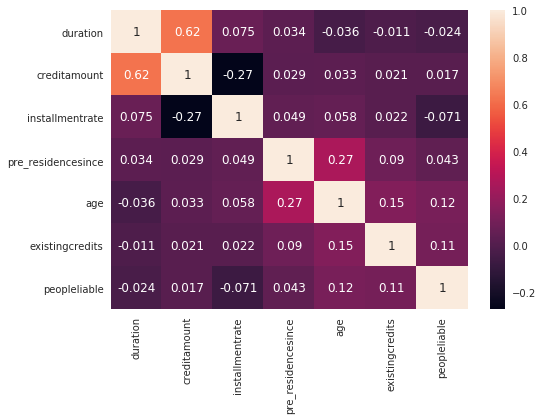

In [19]:
sns.heatmap(numeric1.corr(), annot=True)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric1['intercept'] = 1
vif = pd.DataFrame()
vif["variables"] = numeric1.columns
vif["VIF"] = [variance_inflation_factor(numeric1.values, i) for i in range(numeric1.shape[1])]
vif

,variables,VIF
0,duration,1.857215
1,creditamount,1.994152
2,installmentrate,1.227527
3,pre_residencesince,1.082781
4,age,1.121527
5,existingcredits,1.036226
6,peopleliable,1.030099
7,intercept,35.036815


# EDA

Text(0, 0.5, 'Count')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


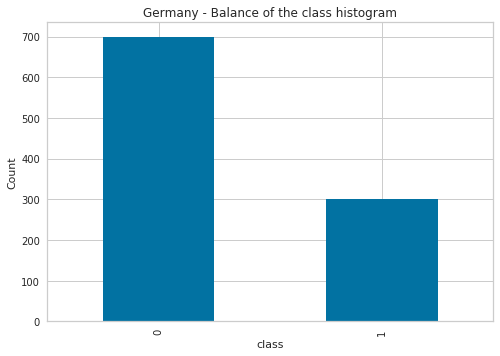

In [21]:
pd.value_counts(transform_data_clean['classification']).plot.bar()
plt.title('Germany - Balance of the class histogram')
plt.xlabel('class')
plt.ylabel('Count')

## Box Plots

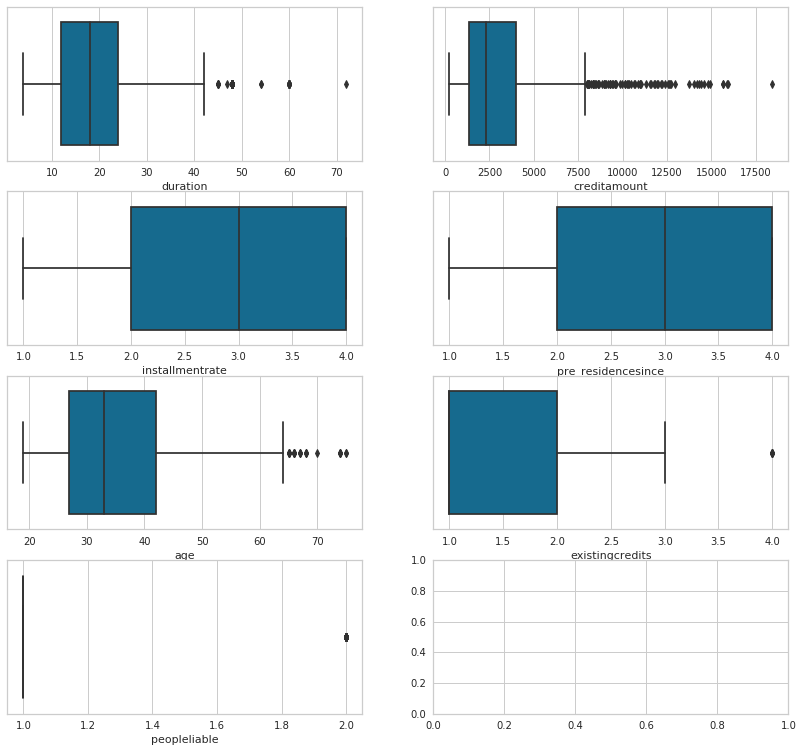

In [22]:
f, axes = plt.subplots(4,2 , figsize=(14, 13))
sns.boxplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.boxplot( transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.boxplot( transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.boxplot( transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.boxplot( transform_data_clean["age"] , ax=axes[2, 0])
sns.boxplot( transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.boxplot( transform_data_clean["peopleliable"] , ax=axes[3, 0])

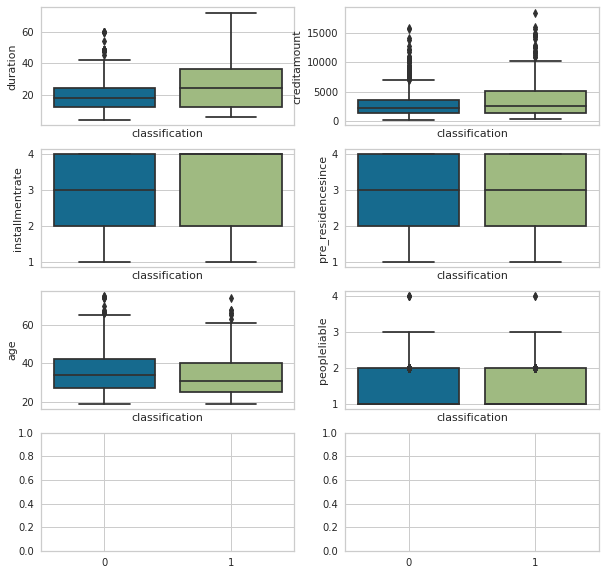

In [23]:
f, axes = plt.subplots(4,2 , figsize=(10, 10), sharex=True)
sns.boxplot( x='classification', y='duration', data=transform_data_clean ,ax=axes[0, 0])
sns.boxplot( x="classification", y='creditamount', data=transform_data_clean ,ax=axes[0, 1])
sns.boxplot( x="classification", y='installmentrate', data=transform_data_clean , ax=axes[1, 0])
sns.boxplot( x="classification", y='pre_residencesince', data=transform_data_clean , ax=axes[1, 1])
sns.boxplot( x="classification", y='age', data=transform_data_clean , ax=axes[2, 0])
sns.boxplot( x="classification", y='existingcredits', data=transform_data_clean ,  ax=axes[2, 1])  
sns.boxplot( x="classification", y='peopleliable', data=transform_data_clean ,  ax=axes[2, 1])      

## Skewness & Distribution Plots

In [24]:
from scipy.stats import skew
skew(transform_data_clean[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 1.09254221,  1.94670202, -0.53055076, -0.27216079,  1.01920752,
        1.27066631,  1.90657936])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

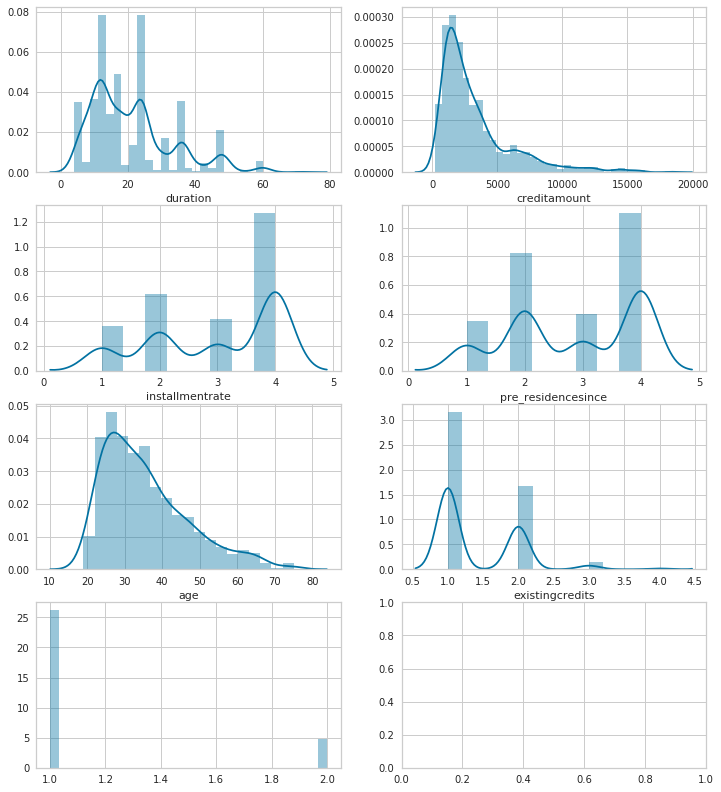

In [26]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot(transform_data_clean["duration"] , ax=axes[0, 0])
sns.distplot(transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.distplot(transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.distplot(transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(transform_data_clean["age"] , ax=axes[2, 0])
sns.distplot(transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(transform_data_clean["peopleliable"] , ax=axes[3, 0])

In [40]:
column_max = transform_data_clean.max()
norm_df = transform_data_clean / column_max

## Split training and test data - Train_Test_Split Approach

In [41]:
X_classification = transform_data_clean.drop('classification', axis = 1)
y_classification = transform_data_clean['classification']

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)
X_train_max = X_train_0.max()
X_test_max = X_test_0.max()
y_train_max = y_train_0.max()
y_test_max = y_test_0.max()

X_train1 = X_train_0 / X_train_max
y_train1 = y_train_0 / y_train_max
y_test1 = y_test_0 / y_test_max
X_test1 = X_test_0 / X_test_max

In [42]:
X_train1.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,existingchecking_A13,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.292257,0.178966,0.742188,0.711875,0.472583,0.351562,0.578125,0.273750,0.270000,0.058750,...,0.721250,0.107500,0.020000,0.20000,0.646250,0.133750,0.607500,0.392500,0.962500,0.037500
std,0.168168,0.152937,0.281942,0.275938,0.152864,0.145588,0.181660,0.446161,0.444237,0.235303,...,0.448665,0.309942,0.140088,0.40025,0.478432,0.340596,0.488613,0.488613,0.190102,0.190102
min,0.055556,0.013569,0.250000,0.250000,0.253333,0.250000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.074577,0.500000,0.500000,0.360000,0.250000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.250000,0.126140,0.750000,0.750000,0.440000,0.250000,0.500000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.333333,0.223594,1.000000,1.000000,0.560000,0.500000,0.500000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
from IPython.display import display, Markdown, Latex
display(Markdown("# Classification - Machine Learning Algorithm"))
def model_fit_vis(
    model,
    X_train,
    y_train,
    X_test,
    y_test,
    title_algorithm,
    algorithm_name,
    dataset=None):
    
    display(Markdown(f'## {title_algorithm}'))
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_train) 
    y_pred1 = model.predict(X_test)    
    
    display(Markdown("### Confusion Matrix"))
    
    
    cfm = confusion_matrix(y_train, y_pred)
    cfm1 = confusion_matrix(y_test, y_pred1)
    print(cfm)
    print(cfm1)
    
    
    display(Markdown(f"### {algorithm_name} prediction probability"))
    acc = accuracy_score(y_train,y_pred)
    acc1 = accuracy_score(y_test,y_pred1)
    print("Training accuracy_score : ",acc)
    print("Test accuracy_score : ",acc1)
    
    return algorithm_name,acc

# Classification - Machine Learning Algorithm

In [44]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
lr.fit(X_train1,y_train1)
y_pred = lr.predict(X_train1) 
y_pred = pd.DataFrame(data=y_pred, index=y_train1.index)
svm_clf_lin = SVC(kernel='linear')
svm_clf_lin.fit(X_train1,y_train1)
y_pred2 = svm_clf_lin.predict(X_train1) 
y_pred2 = pd.DataFrame(data=y_pred2, index=y_train1.index)


In [45]:
# X_train, X_test, y_train, y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)
# original_X_train, original_X_test, original_y_train, original_y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)


In [46]:
results = []


In [47]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
results += [ 
    model_fit_vis(lr, X_train1, y_train1, X_test1, y_test1, title_algorithm='LogisticRegression(LR)', algorithm_name='LR')
]

## LogisticRegression(LR)

### Confusion Matrix

[[510  52]
 [116 122]]
[[118  20]
 [ 28  34]]


### LR prediction probability

Training accuracy_score :  0.79
Test accuracy_score :  0.76


In [48]:
svm_clf_lin = SVC(kernel='linear')
results += [
    model_fit_vis(svm_clf_lin,X_train1,y_train1,X_test1, y_test1,title_algorithm='SVG (linear kernel function)',algorithm_name="SVG (linear)")
]

## SVG (linear kernel function)

### Confusion Matrix

[[503  59]
 [116 122]]
[[116  22]
 [ 25  37]]


### SVG (linear) prediction probability

Training accuracy_score :  0.78125
Test accuracy_score :  0.765


In [49]:
svm_clf_lin = SVC(kernel='linear')
svm_clf_lin.fit(X_train1,y_train1)
y_pred2 = svm_clf_lin.predict(X_train1) 
y_pred2 = pd.DataFrame(data=y_pred2, index=y_train1.index)
lr_mix = pd.concat([y_train1, y_pred2, X_train1], axis=1)

In [50]:
y_pred.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

## Bootstrap - Making New Dataset

In [51]:
column_names=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'classification', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202']

column_names2 = ['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202']

### Bootstrap 100

In [54]:
%%time
data = pd.concat([X_train1, y_train1], axis=1)
data = data.reset_index()
values = data.values
n_iterations = 100
lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []

svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []
svm_df_train = []

n_size = int(len(data))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size) 

    bootstrap_df = pd.DataFrame(bootstrap, columns=['index']+column_names)
    bootstrap_norm_df = bootstrap_df
#     bootstrap_max = bootstrap_df[column_names2].max()
#     bootstrap_norm_df[column_names2] = bootstrap_df[column_names2] / bootstrap_max
    
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())

    X_train = bootstrap_norm_df.drop('classification', axis = 1)
    y_train = bootstrap_norm_df['classification']

    # LR
    lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr.fit(X_train.iloc[:, 1:],y_train)
    lr_pred = lr.predict(X_test1)
    lr_accu = accuracy_score(y_test1, lr_pred)
    lr_cfm = confusion_matrix(y_test1, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_train.iloc[:, 1:],y_train)
    svm_pred = svm_clf.predict(X_test1)
    svm_accu = accuracy_score(y_test1, svm_pred)
    svm_cfm = confusion_matrix(y_test1, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)
    
    # Robust Check
    try:
        lr.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = lr.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    lr_df_train+=[_y_pred]
    
    try:
        svm_clf.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = svm_clf.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    svm_df_train+=[_y_pred]

CPU times: user 50.5 s, sys: 44.7 s, total: 1min 35s
Wall time: 12 s


In [55]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_bootstrap100_train_1,59.000000,20.000000,24.000000,190.000000
1,lr_bootstrap100_train_2,39.000000,38.000000,15.000000,190.000000
2,lr_bootstrap100_train_3,49.000000,40.000000,26.000000,199.000000
3,lr_bootstrap100_train_4,28.000000,37.000000,30.000000,182.000000
4,lr_bootstrap100_train_5,40.000000,34.000000,24.000000,187.000000
...,...,...,...,...,...
97,lr_bootstrap100_train_98,41.000000,33.000000,22.000000,193.000000
98,lr_bootstrap100_train_99,52.000000,32.000000,26.000000,199.000000
99,lr_bootstrap100_train_100,55.000000,41.000000,17.000000,189.000000
100,mean,43.210000,36.360000,20.330000,194.360000


In [56]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_bootstrap100_train_1,56.000000,23.000000,29.00000,185.000000
1,svm_bootstrap100_train_2,39.000000,38.000000,12.00000,193.000000
2,svm_bootstrap100_train_3,46.000000,43.000000,32.00000,193.000000
3,svm_bootstrap100_train_4,25.000000,40.000000,32.00000,180.000000
4,svm_bootstrap100_train_5,39.000000,35.000000,27.00000,184.000000
...,...,...,...,...,...
97,svm_bootstrap100_train_98,42.000000,32.000000,22.00000,193.000000
98,svm_bootstrap100_train_99,47.000000,37.000000,24.00000,201.000000
99,svm_bootstrap100_train_100,53.000000,43.000000,22.00000,184.000000
100,mean,42.310000,37.260000,24.04000,190.650000


### Bootstrap: LR Confusion Matrix & Accuracy

In [57]:
pd.options.display.float_format = "{:,.3f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
97,bootstrap 98,10.000,72.000,66.000,52.000,0.410
98,bootstrap 99,10.000,72.000,66.000,52.000,0.410
99,bootstrap 100,10.000,72.000,66.000,52.000,0.410
100,Mean,10.000,72.000,66.000,52.000,0.410


### Boostrap: SVM Confusion Matrix & Accuracy

In [58]:
pd.options.display.float_format = "{:,.3f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
97,bootstrap 98,10.000,72.000,66.000,52.000,0.410
98,bootstrap 99,10.000,72.000,66.000,52.000,0.410
99,bootstrap 100,10.000,72.000,66.000,52.000,0.410
100,Mean,10.000,72.000,66.000,52.000,0.410


### Bootstrap: Mean & Standard Deviation

In [59]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

In [60]:
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.294,0.175,0.746,0.712,0.478,0.356,0.583,0.270,0.260,0.055,...,0.115,0.024,0.214,0.627,0.135,0.619,0.381,0.964,0.036,0.297
1,0.295,0.178,0.725,0.693,0.474,0.357,0.583,0.273,0.259,0.070,...,0.110,0.026,0.176,0.666,0.131,0.590,0.410,0.966,0.034,0.286
2,0.287,0.176,0.740,0.711,0.474,0.349,0.576,0.268,0.279,0.054,...,0.122,0.016,0.182,0.654,0.147,0.608,0.393,0.958,0.043,0.274
3,0.288,0.181,0.745,0.713,0.481,0.358,0.572,0.254,0.254,0.059,...,0.100,0.019,0.194,0.629,0.159,0.594,0.406,0.964,0.036,0.276
4,0.301,0.183,0.749,0.716,0.479,0.352,0.581,0.278,0.276,0.068,...,0.120,0.028,0.198,0.636,0.139,0.590,0.410,0.969,0.031,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.297,0.181,0.744,0.731,0.471,0.359,0.575,0.275,0.276,0.064,...,0.095,0.020,0.189,0.672,0.119,0.591,0.409,0.965,0.035,0.300
98,0.290,0.180,0.760,0.710,0.472,0.353,0.579,0.279,0.300,0.052,...,0.120,0.028,0.207,0.631,0.134,0.646,0.354,0.968,0.033,0.295
99,0.298,0.176,0.748,0.710,0.478,0.356,0.596,0.306,0.268,0.049,...,0.133,0.025,0.179,0.642,0.154,0.594,0.406,0.959,0.041,0.314
100,0.292,0.178,0.743,0.711,0.472,0.352,0.579,0.271,0.271,0.060,...,0.109,0.020,0.200,0.647,0.133,0.610,0.390,0.962,0.038,0.295


### Botstrap: Confidence Interval

In [61]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

Duration:Lower Boundary : 0.28062498475568226
Duration:Upper Boundary : 0.3024670291332067
Duration:95% Confidence Interval : [0.28062498475568226, 0.3024670291332067]
Credit Amount:Lower Boundary : 0.16820896700603416
Credit Amount:Upper Boundary : 0.1877586214655247
Credit Amount:95% Confidence Interval : [0.16820896700603416, 0.1877586214655247]
installmentrate:Lower Boundary : 0.7231334390850709
installmentrate:Upper Boundary : 0.7626603109149291
installmentrate:95% Confidence Interval : [0.7231334390850709, 0.7626603109149291]
installmentrate:Lower Boundary : 0.6929978121764049
installmentrate:Upper Boundary : 0.7289834378235949
installmentrate:95% Confidence Interval : [0.6929978121764049, 0.7289834378235949]
age:Lower Boundary : 0.4615943191754535
age:Upper Boundary : 0.4828230141578818
age:95% Confidence Interval : [0.4615943191754535, 0.4828230141578818]
existingcredits:Lower Boundary : 0.34231503653748485
existingcredits:Upper Boundary : 0.36123496346251516
existingcredits:95

### Bootstrap: Histogram

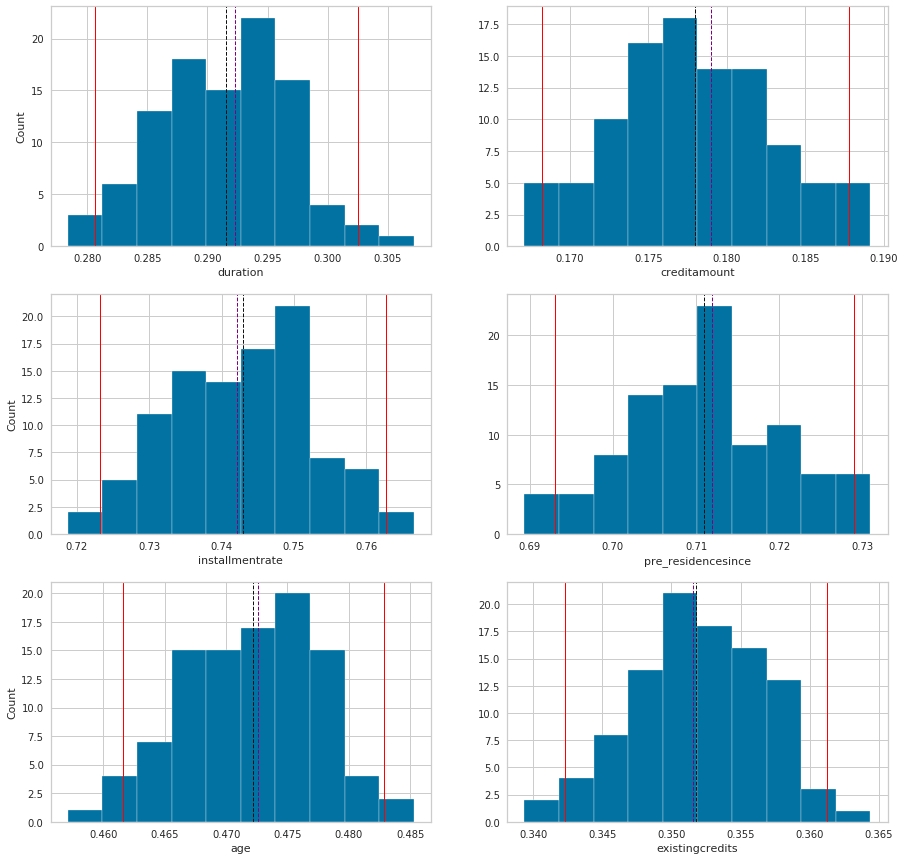

In [62]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(X_train1['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(X_train1['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(X_train1['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(X_train1['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(X_train1['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(X_train1['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

### Bootstrap 1000

In [63]:
%%time
data = pd.concat([X_train1, y_train1], axis=1)
data = data.reset_index()
values = data.values
n_iterations = 1000
lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []

svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []
svm_df_train = []

n_size = int(len(data))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size) 

    bootstrap_df = pd.DataFrame(bootstrap, columns=['index']+column_names)
    bootstrap_norm_df = bootstrap_df
#     bootstrap_max = bootstrap_df[column_names2].max()
#     bootstrap_norm_df[column_names2] = bootstrap_df[column_names2] / bootstrap_max
    
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())

    X_train = bootstrap_norm_df.drop('classification', axis = 1)
    y_train = bootstrap_norm_df['classification']

    # LR
    lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr.fit(X_train.iloc[:, 1:],y_train)
    lr_pred = lr.predict(X_test1)
    lr_accu = accuracy_score(y_test1, lr_pred)
    lr_cfm = confusion_matrix(y_test1, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_train.iloc[:, 1:],y_train)
    svm_pred = svm_clf.predict(X_test1)
    svm_accu = accuracy_score(y_test1, svm_pred)
    svm_cfm = confusion_matrix(y_test1, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)
    
    # Robust Check
    try:
        lr.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = lr.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    lr_df_train+=[_y_pred]
    
    try:
        svm_clf.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = svm_clf.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    svm_df_train+=[_y_pred]

CPU times: user 8min 15s, sys: 7min 39s, total: 15min 54s
Wall time: 2min 1s


In [64]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_bootstrap100_train_1,43.000,30.000,27.000,192.000
1,lr_bootstrap100_train_2,35.000,27.000,20.000,211.000
2,lr_bootstrap100_train_3,42.000,55.000,18.000,182.000
3,lr_bootstrap100_train_4,42.000,37.000,18.000,190.000
4,lr_bootstrap100_train_5,35.000,37.000,19.000,199.000
...,...,...,...,...,...
997,lr_bootstrap100_train_998,39.000,31.000,17.000,216.000
998,lr_bootstrap100_train_999,52.000,34.000,33.000,174.000
999,lr_bootstrap100_train_1000,42.000,40.000,26.000,190.000
1000,mean,43.535,36.970,20.216,193.678


In [65]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_bootstrap100_train_1,44.000,29.000,29.000,190.000
1,svm_bootstrap100_train_2,35.000,27.000,26.000,205.000
2,svm_bootstrap100_train_3,42.000,55.000,20.000,180.000
3,svm_bootstrap100_train_4,42.000,37.000,23.000,185.000
4,svm_bootstrap100_train_5,35.000,37.000,27.000,191.000
...,...,...,...,...,...
997,svm_bootstrap100_train_998,36.000,34.000,30.000,203.000
998,svm_bootstrap100_train_999,49.000,37.000,34.000,173.000
999,svm_bootstrap100_train_1000,42.000,40.000,25.000,191.000
1000,mean,42.450,38.055,23.716,190.178


### Bootstrap: LR Confusion Matrix & Accuracy

In [66]:
pd.options.display.float_format = "{:,.3f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
997,bootstrap 998,10.000,72.000,66.000,52.000,0.410
998,bootstrap 999,10.000,72.000,66.000,52.000,0.410
999,bootstrap 1000,10.000,72.000,66.000,52.000,0.410
1000,Mean,10.008,72.005,65.995,51.992,0.410


### Boostrap: SVM Confusion Matrix & Accuracy

In [67]:
pd.options.display.float_format = "{:,.3f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
997,bootstrap 998,10.000,72.000,66.000,52.000,0.410
998,bootstrap 999,10.000,72.000,66.000,52.000,0.410
999,bootstrap 1000,10.000,72.000,66.000,52.000,0.410
1000,Mean,10.000,72.000,66.000,52.000,0.410


### Bootstrap: Mean & Standard Deviation

In [68]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

In [69]:
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.288,0.180,0.741,0.718,0.466,0.343,0.585,0.259,0.292,0.065,...,0.107,0.020,0.196,0.640,0.144,0.595,0.405,0.949,0.051,0.299
1,0.295,0.184,0.746,0.705,0.473,0.361,0.581,0.247,0.290,0.049,...,0.094,0.028,0.211,0.630,0.131,0.589,0.411,0.965,0.035,0.310
2,0.283,0.171,0.739,0.734,0.478,0.358,0.573,0.292,0.256,0.075,...,0.104,0.019,0.194,0.654,0.134,0.605,0.395,0.960,0.040,0.278
3,0.293,0.172,0.751,0.706,0.464,0.356,0.572,0.279,0.246,0.058,...,0.098,0.021,0.189,0.654,0.136,0.600,0.400,0.965,0.035,0.291
4,0.295,0.183,0.742,0.710,0.481,0.353,0.579,0.249,0.286,0.066,...,0.107,0.020,0.209,0.644,0.128,0.589,0.411,0.971,0.029,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.302,0.186,0.735,0.704,0.473,0.353,0.575,0.259,0.261,0.062,...,0.102,0.015,0.214,0.644,0.128,0.600,0.400,0.966,0.034,0.276
998,0.298,0.179,0.734,0.713,0.474,0.353,0.581,0.286,0.268,0.050,...,0.104,0.018,0.212,0.639,0.131,0.620,0.380,0.965,0.035,0.306
999,0.286,0.169,0.748,0.728,0.483,0.364,0.570,0.271,0.268,0.052,...,0.116,0.015,0.209,0.660,0.116,0.621,0.379,0.961,0.039,0.299
1000,0.292,0.179,0.742,0.711,0.472,0.352,0.578,0.274,0.270,0.059,...,0.108,0.020,0.200,0.647,0.134,0.607,0.393,0.962,0.038,0.298


### Botstrap: Confidence Interval

In [70]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

Duration:Lower Boundary : 0.28078310968443204
Duration:Upper Boundary : 0.30363452920445594
Duration:95% Confidence Interval : [0.28078310968443204, 0.30363452920445594]
Credit Amount:Lower Boundary : 0.16894012528003438
Credit Amount:Upper Boundary : 0.18946720781809795
Credit Amount:95% Confidence Interval : [0.16894012528003438, 0.18946720781809795]
installmentrate:Lower Boundary : 0.7235089650388741
installmentrate:Upper Boundary : 0.7607060349611247
installmentrate:95% Confidence Interval : [0.7235089650388741, 0.7607060349611247]
installmentrate:Lower Boundary : 0.6918824624445781
installmentrate:Upper Boundary : 0.7306731625554224
installmentrate:95% Confidence Interval : [0.6918824624445781, 0.7306731625554224]
age:Lower Boundary : 0.46181625465796994
age:Upper Boundary : 0.4830808453420311
age:95% Confidence Interval : [0.46181625465796994, 0.4830808453420311]
existingcredits:Lower Boundary : 0.3415945896669239
existingcredits:Upper Boundary : 0.3614760353330758
existingcredit

### Bootstrap: Histogram

Text(0.5, 0, 'existingcredits')

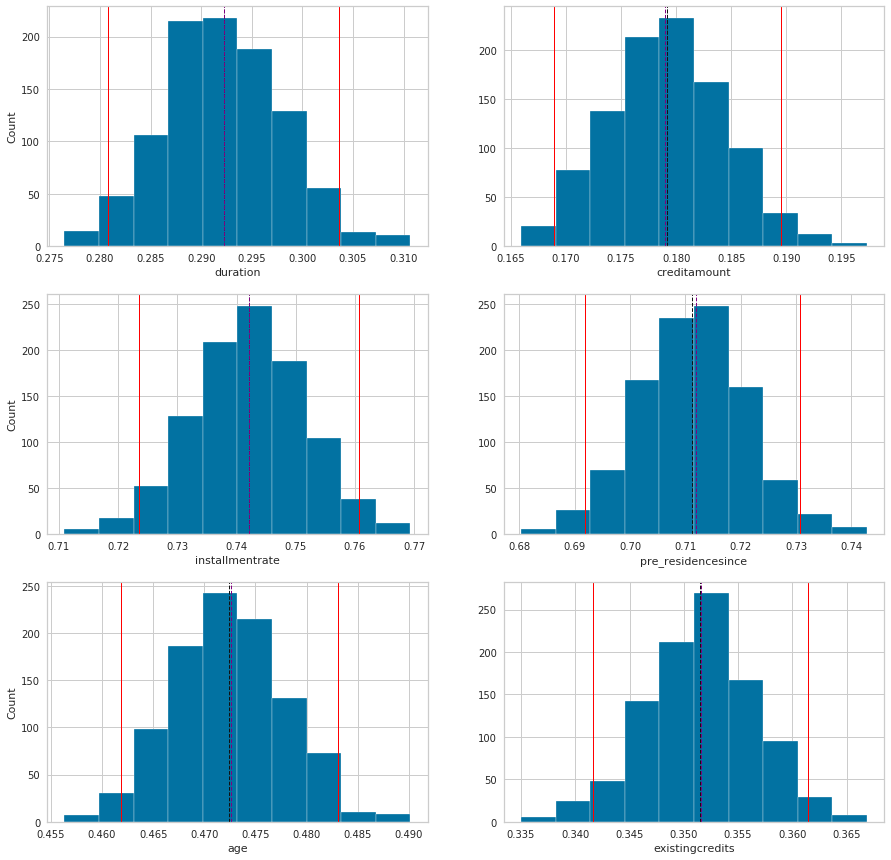

In [71]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(X_train1['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(X_train1['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(X_train1['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(X_train1['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(X_train1['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(X_train1['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

### Bootstrap 5000

In [72]:
%%time
data = pd.concat([X_train1, y_train1], axis=1)
data = data.reset_index()
values = data.values
n_iterations = 5000
lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []

svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []
svm_df_train = []

n_size = int(len(data))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size) 

    bootstrap_df = pd.DataFrame(bootstrap, columns=['index']+column_names)
    bootstrap_norm_df = bootstrap_df
#     bootstrap_max = bootstrap_df[column_names2].max()
#     bootstrap_norm_df[column_names2] = bootstrap_df[column_names2] / bootstrap_max
    
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())

    X_train = bootstrap_norm_df.drop('classification', axis = 1)
    y_train = bootstrap_norm_df['classification']

    # LR
    lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr.fit(X_train.iloc[:, 1:],y_train)
    lr_pred = lr.predict(X_test1)
    lr_accu = accuracy_score(y_test1, lr_pred)
    lr_cfm = confusion_matrix(y_test1, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_train.iloc[:, 1:],y_train)
    svm_pred = svm_clf.predict(X_test1)
    svm_accu = accuracy_score(y_test1, svm_pred)
    svm_cfm = confusion_matrix(y_test1, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)
    
    # Robust Check
    try:
        lr.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = lr.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    lr_df_train+=[_y_pred]
    
    try:
        svm_clf.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = svm_clf.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    svm_df_train+=[_y_pred]

CPU times: user 41min 39s, sys: 38min 4s, total: 1h 19min 43s
Wall time: 10min 1s


In [73]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_bootstrap100_train_1,45.000,36.000,25.000,189.000
1,lr_bootstrap100_train_2,53.000,34.000,22.000,173.000
2,lr_bootstrap100_train_3,50.000,37.000,22.000,178.000
3,lr_bootstrap100_train_4,39.000,32.000,21.000,203.000
4,lr_bootstrap100_train_5,43.000,31.000,21.000,195.000
...,...,...,...,...,...
4997,lr_bootstrap100_train_4998,49.000,23.000,19.000,201.000
4998,lr_bootstrap100_train_4999,52.000,43.000,15.000,201.000
4999,lr_bootstrap100_train_5000,32.000,34.000,19.000,197.000
5000,mean,43.694,36.761,20.282,193.422


In [74]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_bootstrap100_train_1,43.000,38.000,26.000,188.000
1,svm_bootstrap100_train_2,55.000,32.000,26.000,169.000
2,svm_bootstrap100_train_3,49.000,38.000,23.000,177.000
3,svm_bootstrap100_train_4,35.000,36.000,23.000,201.000
4,svm_bootstrap100_train_5,44.000,30.000,30.000,186.000
...,...,...,...,...,...
4997,svm_bootstrap100_train_4998,51.000,21.000,27.000,193.000
4998,svm_bootstrap100_train_4999,44.000,51.000,19.000,197.000
4999,svm_bootstrap100_train_5000,31.000,35.000,28.000,188.000
5000,mean,42.600,37.854,23.941,189.763


### Bootstrap: LR Confusion Matrix & Accuracy

In [75]:
pd.options.display.float_format = "{:,.3f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
4997,bootstrap 4998,10.000,72.000,66.000,52.000,0.410
4998,bootstrap 4999,10.000,72.000,66.000,52.000,0.410
4999,bootstrap 5000,10.000,72.000,66.000,52.000,0.410
5000,Mean,10.003,72.004,65.996,51.997,0.410


### Boostrap: SVM Confusion Matrix & Accuracy

In [76]:
pd.options.display.float_format = "{:,.3f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
4997,bootstrap 4998,10.000,72.000,66.000,52.000,0.410
4998,bootstrap 4999,10.000,72.000,66.000,52.000,0.410
4999,bootstrap 5000,10.000,72.000,66.000,52.000,0.410
5000,Mean,10.000,72.000,66.000,52.000,0.410


### Bootstrap: Mean & Standard Deviation

In [77]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

In [78]:
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.294,0.175,0.728,0.705,0.466,0.354,0.581,0.265,0.270,0.052,...,0.096,0.021,0.195,0.679,0.105,0.640,0.360,0.965,0.035,0.300
1,0.294,0.188,0.747,0.716,0.470,0.347,0.576,0.295,0.279,0.061,...,0.098,0.021,0.182,0.649,0.147,0.608,0.393,0.966,0.034,0.321
2,0.296,0.176,0.749,0.726,0.474,0.343,0.576,0.291,0.258,0.054,...,0.129,0.014,0.211,0.649,0.126,0.632,0.367,0.965,0.035,0.320
3,0.289,0.179,0.746,0.714,0.477,0.350,0.598,0.250,0.266,0.074,...,0.121,0.024,0.191,0.659,0.126,0.590,0.410,0.963,0.037,0.318
4,0.298,0.182,0.753,0.723,0.473,0.355,0.572,0.265,0.278,0.055,...,0.079,0.013,0.205,0.654,0.129,0.601,0.399,0.963,0.037,0.299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,0.284,0.168,0.749,0.714,0.468,0.345,0.568,0.256,0.302,0.066,...,0.083,0.009,0.216,0.646,0.129,0.591,0.409,0.963,0.037,0.299
4998,0.293,0.177,0.746,0.697,0.477,0.361,0.588,0.290,0.253,0.062,...,0.106,0.022,0.215,0.619,0.144,0.629,0.371,0.970,0.030,0.271
4999,0.302,0.182,0.740,0.688,0.471,0.342,0.571,0.261,0.284,0.061,...,0.110,0.019,0.189,0.644,0.149,0.600,0.400,0.966,0.034,0.297
5000,0.292,0.179,0.742,0.712,0.473,0.352,0.578,0.274,0.270,0.059,...,0.108,0.020,0.200,0.646,0.134,0.607,0.393,0.962,0.038,0.297


### Botstrap: Confidence Interval

In [79]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

Duration:Lower Boundary : 0.2807493665718977
Duration:Upper Boundary : 0.3037264250947674
Duration:95% Confidence Interval : [0.2807493665718977, 0.3037264250947674]
Credit Amount:Lower Boundary : 0.16854583319006286
Credit Amount:Upper Boundary : 0.18938868944345946
Credit Amount:95% Confidence Interval : [0.16854583319006286, 0.18938868944345946]
installmentrate:Lower Boundary : 0.7223274458215492
installmentrate:Upper Boundary : 0.7616233041784535
installmentrate:95% Confidence Interval : [0.7223274458215492, 0.7616233041784535]
installmentrate:Lower Boundary : 0.6926863112721554
installmentrate:Upper Boundary : 0.7314624387278416
installmentrate:95% Confidence Interval : [0.6926863112721554, 0.7314624387278416]
age:Lower Boundary : 0.46192806733431113
age:Upper Boundary : 0.48311309933235314
age:95% Confidence Interval : [0.46192806733431113, 0.48311309933235314]
existingcredits:Lower Boundary : 0.3414917213726471
existingcredits:Upper Boundary : 0.3618136536273539
existingcredits:

### Bootstrap: Histogram

Text(0.5, 0, 'existingcredits')

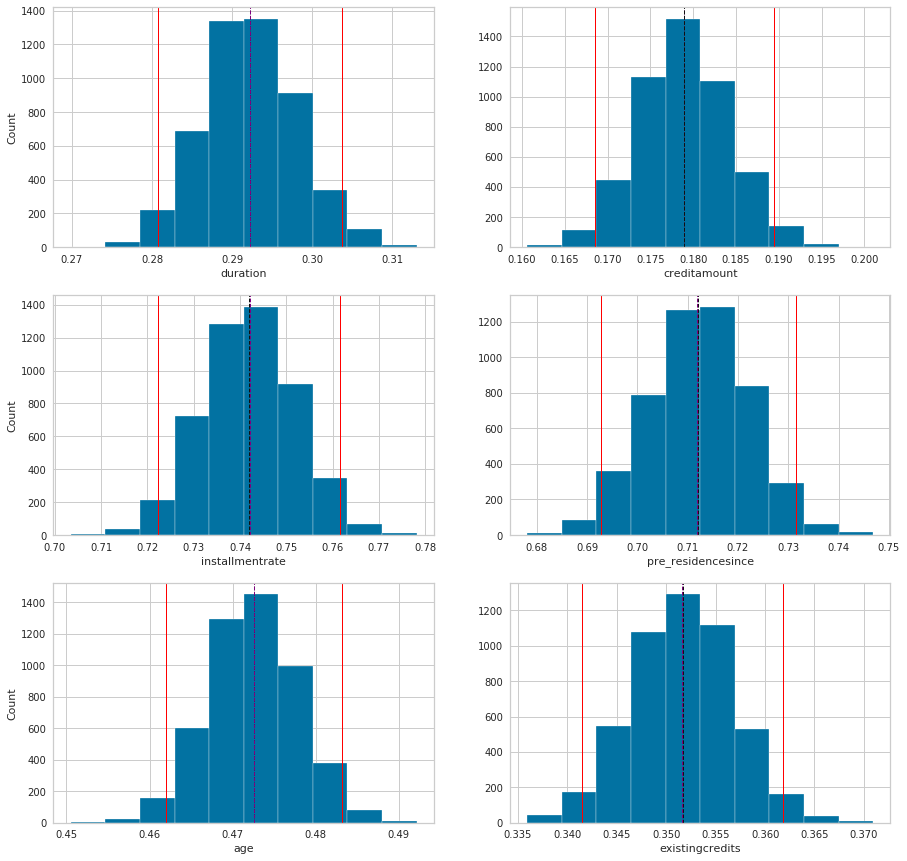

In [80]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(X_train1['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(X_train1['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(X_train1['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(X_train1['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(X_train1['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(X_train1['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

### Bootstrap 10,000

In [81]:
%%time
data = pd.concat([X_train1, y_train1], axis=1)
data = data.reset_index()
values = data.values
n_iterations = 10000
lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []

svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []
svm_df_train = []

n_size = int(len(data))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size) 

    bootstrap_df = pd.DataFrame(bootstrap, columns=['index']+column_names)
    bootstrap_norm_df = bootstrap_df
#     bootstrap_max = bootstrap_df[column_names2].max()
#     bootstrap_norm_df[column_names2] = bootstrap_df[column_names2] / bootstrap_max
    
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())

    X_train = bootstrap_norm_df.drop('classification', axis = 1)
    y_train = bootstrap_norm_df['classification']

    # LR
    lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr.fit(X_train.iloc[:, 1:],y_train)
    lr_pred = lr.predict(X_test1)
    lr_accu = accuracy_score(y_test1, lr_pred)
    lr_cfm = confusion_matrix(y_test1, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X_train.iloc[:, 1:],y_train)
    svm_pred = svm_clf.predict(X_test1)
    svm_accu = accuracy_score(y_test1, svm_pred)
    svm_cfm = confusion_matrix(y_test1, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)
    
    # Robust Check
    try:
        lr.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = lr.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    lr_df_train+=[_y_pred]
    
    try:
        svm_clf.fit(X_train.drop('index',axis = 1),y_train)
    except:
        print(X_train.isna().sum()[X_train.isna().sum() >1])
        raise 'err'
    _y_pred = svm_clf.predict(X_train.drop('index',axis = 1))
    _y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_bootstrap100_train_{i}'] ) 
    _y_pred['index'] = _y_pred['index'].astype(int)
    svm_df_train+=[_y_pred]

CPU times: user 1h 24min 4s, sys: 1h 15min 56s, total: 2h 40min 1s
Wall time: 20min 6s


In [82]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_bootstrap100_train_1,49.000,27.000,20.000,189.000
1,lr_bootstrap100_train_2,44.000,44.000,15.000,197.000
2,lr_bootstrap100_train_3,34.000,40.000,9.000,200.000
3,lr_bootstrap100_train_4,35.000,40.000,15.000,202.000
4,lr_bootstrap100_train_5,53.000,31.000,17.000,181.000
...,...,...,...,...,...
9997,lr_bootstrap100_train_9998,39.000,36.000,27.000,190.000
9998,lr_bootstrap100_train_9999,40.000,40.000,20.000,183.000
9999,lr_bootstrap100_train_10000,36.000,51.000,23.000,185.000
10000,mean,43.710,36.858,20.211,193.410


In [83]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_bootstrap100_train_1,49.000,27.000,27.000,182.000
1,svm_bootstrap100_train_2,43.000,45.000,23.000,189.000
2,svm_bootstrap100_train_3,32.000,42.000,9.000,200.000
3,svm_bootstrap100_train_4,36.000,39.000,20.000,197.000
4,svm_bootstrap100_train_5,50.000,34.000,26.000,172.000
...,...,...,...,...,...
9997,svm_bootstrap100_train_9998,37.000,38.000,29.000,188.000
9998,svm_bootstrap100_train_9999,37.000,43.000,19.000,184.000
9999,svm_bootstrap100_train_10000,39.000,48.000,22.000,186.000
10000,mean,42.619,37.949,23.879,189.743


### Bootstrap: LR Confusion Matrix & Accuracy

In [84]:
pd.options.display.float_format = "{:,.3f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
9997,bootstrap 9998,10.000,72.000,66.000,52.000,0.410
9998,bootstrap 9999,10.000,72.000,66.000,52.000,0.410
9999,bootstrap 10000,10.000,72.000,66.000,52.000,0.410
10000,Mean,10.003,72.007,65.993,51.997,0.410


### Boostrap: SVM Confusion Matrix & Accuracy

In [85]:
pd.options.display.float_format = "{:,.3f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,10.000,72.000,66.000,52.000,0.410
1,bootstrap 2,10.000,72.000,66.000,52.000,0.410
2,bootstrap 3,10.000,72.000,66.000,52.000,0.410
3,bootstrap 4,10.000,72.000,66.000,52.000,0.410
4,bootstrap 5,10.000,72.000,66.000,52.000,0.410
...,...,...,...,...,...,...
9997,bootstrap 9998,10.000,72.000,66.000,52.000,0.410
9998,bootstrap 9999,10.000,72.000,66.000,52.000,0.410
9999,bootstrap 10000,10.000,72.000,66.000,52.000,0.410
10000,Mean,10.000,72.000,66.000,52.000,0.410


### Bootstrap: Mean & Standard Deviation

In [86]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

In [87]:
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.293,0.185,0.730,0.720,0.472,0.355,0.575,0.271,0.291,0.058,...,0.109,0.026,0.200,0.655,0.119,0.596,0.404,0.964,0.036,0.286
1,0.296,0.182,0.751,0.714,0.477,0.349,0.569,0.276,0.287,0.046,...,0.117,0.018,0.182,0.646,0.154,0.579,0.421,0.974,0.026,0.290
2,0.287,0.173,0.744,0.704,0.471,0.351,0.588,0.269,0.244,0.065,...,0.096,0.028,0.206,0.624,0.142,0.620,0.380,0.961,0.039,0.301
3,0.297,0.180,0.733,0.716,0.469,0.354,0.588,0.274,0.271,0.041,...,0.100,0.020,0.214,0.645,0.121,0.608,0.393,0.956,0.044,0.276
4,0.280,0.162,0.755,0.702,0.462,0.340,0.577,0.286,0.271,0.061,...,0.100,0.019,0.215,0.645,0.121,0.585,0.415,0.963,0.037,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.290,0.181,0.745,0.712,0.469,0.350,0.566,0.278,0.290,0.060,...,0.100,0.031,0.184,0.646,0.139,0.603,0.398,0.956,0.044,0.301
9998,0.296,0.180,0.743,0.732,0.479,0.360,0.591,0.292,0.256,0.065,...,0.136,0.018,0.207,0.641,0.134,0.580,0.420,0.961,0.039,0.301
9999,0.290,0.173,0.744,0.696,0.460,0.352,0.569,0.275,0.278,0.064,...,0.122,0.018,0.185,0.656,0.141,0.611,0.389,0.961,0.039,0.276
10000,0.292,0.179,0.742,0.712,0.473,0.352,0.578,0.274,0.270,0.059,...,0.108,0.020,0.200,0.646,0.134,0.607,0.393,0.962,0.038,0.297


### Botstrap: Confidence Interval

In [88]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

Duration:Lower Boundary : 0.2805761456948799
Duration:Upper Boundary : 0.3039921181940043
Duration:95% Confidence Interval : [0.2805761456948799, 0.3039921181940043]
Credit Amount:Lower Boundary : 0.16841717581922916
Credit Amount:Upper Boundary : 0.18955853362226033
Credit Amount:95% Confidence Interval : [0.16841717581922916, 0.18955853362226033]
installmentrate:Lower Boundary : 0.7226331790005085
installmentrate:Upper Boundary : 0.7616270709994901
installmentrate:95% Confidence Interval : [0.7226331790005085, 0.7616270709994901]
installmentrate:Lower Boundary : 0.6929697639886934
installmentrate:Upper Boundary : 0.7309313610113142
installmentrate:95% Confidence Interval : [0.6929697639886934, 0.7309313610113142]
age:Lower Boundary : 0.46194361063498174
age:Upper Boundary : 0.48306649936502116
age:95% Confidence Interval : [0.46194361063498174, 0.48306649936502116]
existingcredits:Lower Boundary : 0.3415200001718981
existingcredits:Upper Boundary : 0.36159206232810437
existingcredits

### Bootstrap: Histogram

Text(0.5, 0, 'existingcredits')

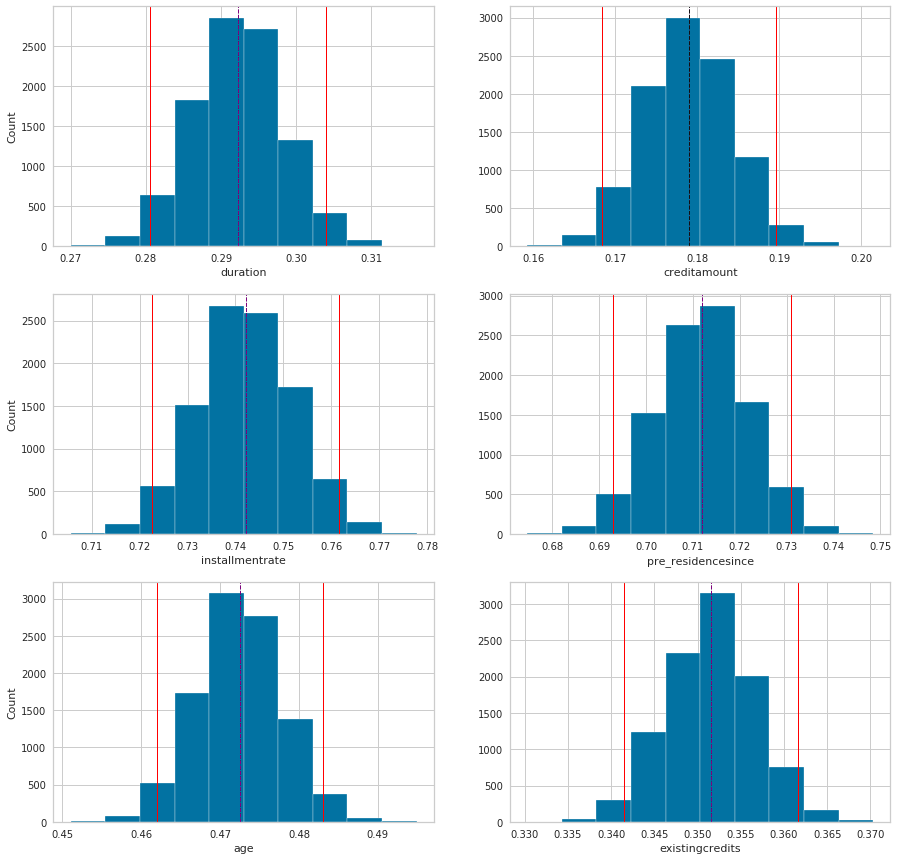

In [89]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(X_train1['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(X_train1['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(X_train1['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(X_train1['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(X_train1['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(X_train1['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

## Random Oversampling the minority class from the original dataset

In [90]:
ov_raw = pd.concat([X_train1, y_train1],axis=1)
ov_raw = ov_raw.reset_index()
ov_raw.classification.value_counts()

0.000    562
1.000    238
Name: classification, dtype: int64

### Seperate Minority & Majority class

In [91]:
bad_credit = ov_raw[ov_raw.classification==1]
good_credit = ov_raw[ov_raw.classification==0]

In [92]:
bad_credit_oversample = resample(bad_credit, replace=True, n_samples=len(good_credit))

In [93]:
norm_ov_df = pd.concat([good_credit,bad_credit_oversample])

In [94]:
# column_max_ov = ov_df[column_names].max()
# norm_ov_df = ov_df
# norm_ov_df[column_names] = norm_ov_df[column_names] / column_max_ov

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

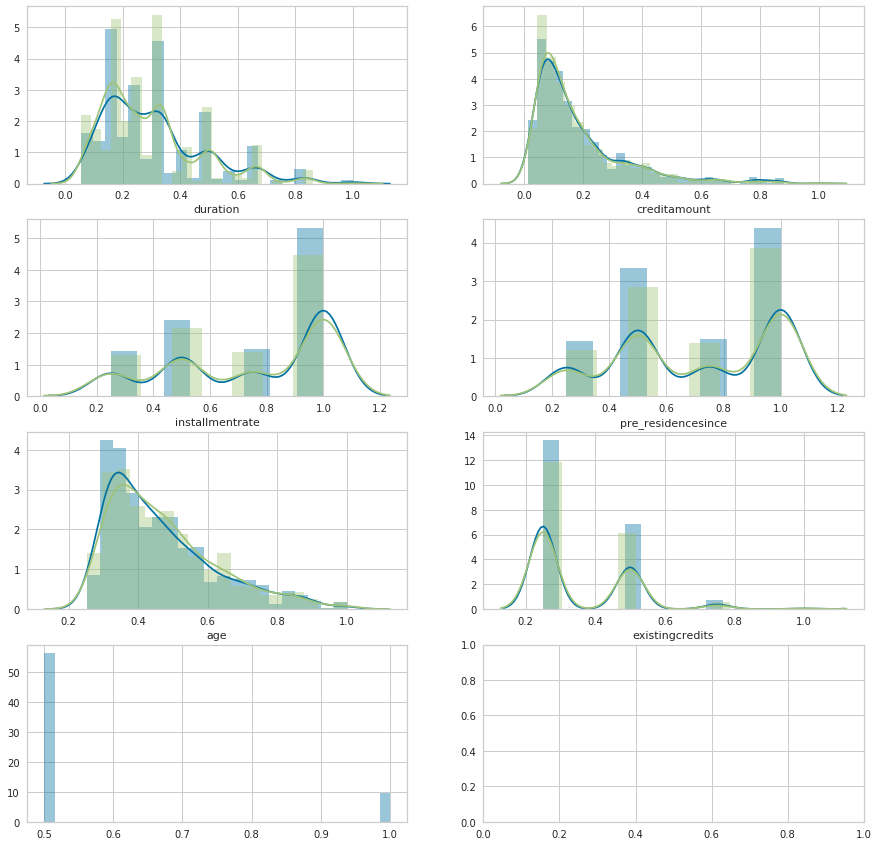

In [96]:
f, axes = plt.subplots(4,2 , figsize=(15, 15))
sns.distplot(norm_ov_df['duration'], ax = axes[0,0])
sns.distplot(X_train1['duration'], ax = axes[0,0])

sns.distplot(norm_ov_df['creditamount'], ax=axes[0,1])
sns.distplot(X_train1['creditamount'], ax=axes[0,1])

sns.distplot(norm_ov_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(X_train1["installmentrate"] , ax=axes[1, 0])

sns.distplot(norm_ov_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(X_train1["pre_residencesince"] , ax=axes[1, 1])

sns.distplot(norm_ov_df["age"] , ax=axes[2, 0])
sns.distplot(X_train1["age"] , ax=axes[2, 0])

sns.distplot(norm_ov_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(X_train1["existingcredits"] ,  ax=axes[2, 1])

sns.distplot(norm_ov_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(X_train1["peopleliable"] , ax=axes[3, 0])

In [97]:
X6 = norm_ov_df.drop('classification', axis = 1)
y6 = norm_ov_df['classification']

In [98]:
# %%time
data = pd.concat([X6, y6], axis=1)

n_iterations = 100

lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []
svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []

In [99]:
n_size = int(len(data))

    
X_train = data.drop(['classification'],axis=1)
y_train = data['classification']

lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
try:
    lr.fit(X_train.drop(['index'],axis=1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = lr.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_oversample'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

lr_df_train=[_y_pred]

print('end')

end


In [100]:
svm_df_train=[]
svm_clf_8 = SVC(kernel='linear')
try:
    svm_clf_8.fit(X_train.drop('index',axis = 1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = svm_clf_8.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_oversample'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

svm_df_train=[_y_pred]

print('end')

end


In [101]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_oversample,171.000,96.000,0.000,82.000
1,mean,171.000,96.000,0.000,82.000
2,standard deviation,nan,nan,nan,nan


In [102]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
    join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_oversample,168.000,116.000,0.000,65.000
1,mean,168.000,116.000,0.000,65.000
2,standard deviation,nan,nan,nan,nan


In [103]:
# Test error
svm = SVC(kernel='linear')
svm.fit(X6.iloc[:,1:], y6)
u_pred4 = svm.predict(X_test1)
accu18 = accuracy_score(y_test1, u_pred4)
print("accuracy_score : ",accu18)
cfm_18 = confusion_matrix(y_test1, u_pred4)
print (cfm_18)

accuracy_score :  0.71
[[94 44]
 [14 48]]


In [104]:
lr.fit(X6.iloc[:,1:],y6)
u_pred4 = lr.predict(X_test1)
accu18 = accuracy_score(y_test1, u_pred4)
print("accuracy_score : ",accu18)
cfm_18 = confusion_matrix(y_test1, u_pred4)
print (cfm_18)

accuracy_score :  0.735
[[99 39]
 [14 48]]


## Undersampling the majority class from the Original

In [105]:
u_raw = pd.concat([X_train1, y_train1],axis=1)
u_raw = u_raw.reset_index()
u_raw.classification.value_counts()

0.000    562
1.000    238
Name: classification, dtype: int64

## Seperate Minority & Majority class

In [106]:
bad_credit2 = u_raw[u_raw.classification==1]
good_credit2 = u_raw[u_raw.classification==0]

In [107]:
good_credit_undersample = resample(good_credit2, replace=True, n_samples=len(bad_credit2))

In [108]:
u_df = pd.concat([good_credit_undersample,bad_credit2])

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

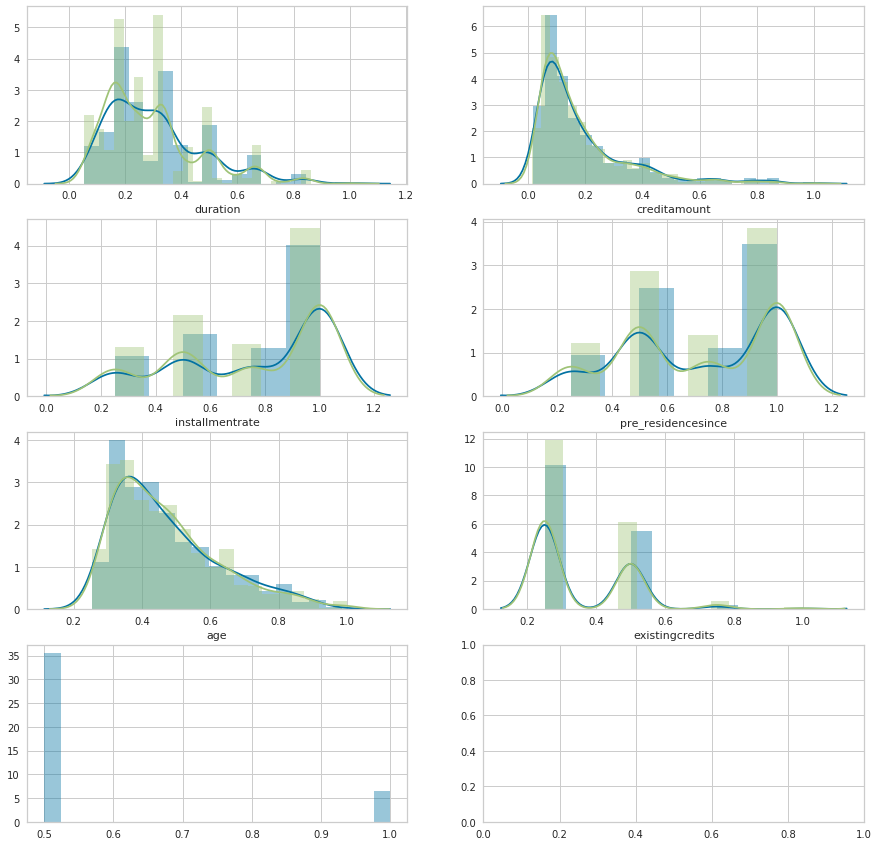

In [109]:
f, axes = plt.subplots(4,2 , figsize=(15, 15))
sns.distplot(u_df['duration'], ax = axes[0,0])
sns.distplot(X_train1['duration'], ax = axes[0,0])
sns.distplot(u_df['creditamount'], ax=axes[0,1])
sns.distplot(X_train1['creditamount'], ax=axes[0,1])

sns.distplot(u_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(X_train1["installmentrate"] , ax=axes[1, 0])

sns.distplot(u_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(X_train1["pre_residencesince"] , ax=axes[1, 1])

sns.distplot(u_df["age"] , ax=axes[2, 0])
sns.distplot(X_train1["age"] , ax=axes[2, 0])

sns.distplot(u_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(X_train1["existingcredits"] ,  ax=axes[2, 1])

sns.distplot(u_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(X_train1["peopleliable"] , ax=axes[3, 0])
plt.savefig('undersampling_dist.png')

In [111]:
X7 = u_df.drop('classification', axis = 1)
y7 = u_df['classification']

In [112]:
# %%time
data = pd.concat([X7, y7], axis=1)

n_iterations = 100

lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []
svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []


In [113]:
n_size = int(len(data))

    
X_train = data.drop(['classification'],axis=1)
y_train = data['classification']

lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
try:
    lr.fit(X_train.drop(['index'],axis=1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = lr.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_undersample'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

lr_df_train=[_y_pred]

print('end')

end


In [114]:
svm_df_train=[]
svm_clf_8 = SVC(kernel='linear')
try:
    svm_clf_8.fit(X_train.drop('index',axis = 1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = svm_clf_8.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_undersample'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

svm_df_train=[_y_pred]

print('end')

end


In [115]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
#     join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_undersample,142.000,99.000,0.000,235.000
1,mean,142.000,99.000,0.000,235.000
2,standard deviation,nan,nan,nan,nan


In [116]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
#     join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_undersample,146.000,95.000,4.000,231.000
1,mean,146.000,95.000,4.000,231.000
2,standard deviation,nan,nan,nan,nan


In [117]:
# Test error
svm = SVC(kernel='linear')
svm.fit(X7.iloc[:,1:], y7)
u_pred4 = svm.predict(X_test1)
accu18 = accuracy_score(y_test1, u_pred4)
print("accuracy_score : ",accu18)
cfm_18 = confusion_matrix(y_test1, u_pred4)
print (cfm_18)

accuracy_score :  0.75
[[100  38]
 [ 12  50]]


In [118]:
lr.fit(X7.iloc[:,1:],y7)
u_pred4 = lr.predict(X_test1)
accu18 = accuracy_score(y_test1, u_pred4)
print("accuracy_score : ",accu18)
cfm_18 = confusion_matrix(y_test1, u_pred4)
print (cfm_18)

accuracy_score :  0.715
[[93 45]
 [12 50]]


## Adding Noise on numercial variables to Original set

In [119]:
# noise = transform_data_clean.copy()
noise = pd.concat([X_train1, y_train1], axis=1)
noise = noise.reset_index()
noise

,index,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,existingchecking_A11,existingchecking_A12,...,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202,classification
0,188,0.167,0.037,1.000,0.250,0.267,0.250,0.500,1.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000
1,194,0.625,0.165,1.000,1.000,0.280,0.250,0.500,0.000,1.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000
2,225,0.500,0.142,1.000,0.500,0.360,0.500,0.500,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000
3,580,0.250,0.057,0.750,0.750,0.400,0.500,0.500,0.000,1.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000
4,428,0.125,0.071,0.250,1.000,0.267,0.250,0.500,0.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,320,0.417,0.231,1.000,0.500,0.373,0.500,0.500,0.000,1.000,...,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,1.000
796,527,0.056,0.082,0.500,0.250,0.560,0.500,1.000,0.000,0.000,...,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
797,996,0.417,0.209,1.000,1.000,0.533,0.250,0.500,1.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000
798,125,0.167,0.115,1.000,0.500,0.400,0.500,0.500,1.000,0.000,...,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [120]:
mean_d, std_d = X_train1['duration'].max() , X_train1['duration'].std()
mean_c, std_c = X_train1['creditamount'].max() , X_train1['creditamount'].std()
mean_i, std_i = X_train1['installmentrate'].max() , X_train1['installmentrate'].std()
mean_p, std_p = X_train1['pre_residencesince'].max() , X_train1['pre_residencesince'].std()
mean_a, std_a = X_train1['age'].max() , X_train1['age'].std()
mean_e, std_e = X_train1['existingcredits'].max() , X_train1['existingcredits'].std()
mean_pe, std_pe = X_train1['peopleliable'].max() , X_train1['peopleliable'].std()

n_size = int(len(noise))
d_noise = np.random.normal(mean_d, std_d, [n_size,1])
c_noise = np.random.normal(mean_c, std_c, [n_size,1])
i_noise = np.random.normal(mean_i, std_i, [n_size,1])
p_noise = np.random.normal(mean_p, std_p, [n_size,1])
a_noise = np.random.normal(mean_a, std_a, [n_size,1])
e_noise = np.random.normal(mean_e, std_e, [n_size,1])
pe_noise = np.random.normal(mean_pe, std_pe, [n_size,1])

In [121]:
clean_signal_d = pd.DataFrame(data=noise, index=noise.index, columns=['duration'])
clean_signal_c = pd.DataFrame(data=noise, index=noise.index, columns=['creditamount'])
clean_signal_i = pd.DataFrame(data=noise, index=noise.index, columns=['installmentrate'])
clean_signal_p = pd.DataFrame(data=noise, index=noise.index, columns=['pre_residencesince'])
clean_signal_a = pd.DataFrame(data=noise, index=noise.index, columns=['age'])
clean_signal_e = pd.DataFrame(data=noise, index=noise.index, columns=['existingcredits'])
clean_signal_pe = pd.DataFrame(data=noise, index=noise.index, columns=['peopleliable'])

In [122]:
duration_n = clean_signal_d + d_noise
creditamount_n = clean_signal_c + c_noise
installmentrate_n = clean_signal_i + i_noise
pre_residencesince_n = clean_signal_p + p_noise
age_n = clean_signal_a + a_noise
existingcredits_n = clean_signal_e + e_noise
peopleliable_n = clean_signal_pe + pe_noise

In [123]:
noise.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable'], axis=1, inplace=True)

In [124]:
noise_or = pd.concat([duration_n, creditamount_n, installmentrate_n, pre_residencesince_n, 
                           age_n,existingcredits_n,peopleliable_n],axis=1)

In [125]:
noise_df = pd.concat([noise,noise_or],axis=1) 

In [126]:
skew(noise_df[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 0.36892689,  0.57681591, -0.16005816,  0.03810184,  0.40992574,
        0.49065936,  0.71402875])

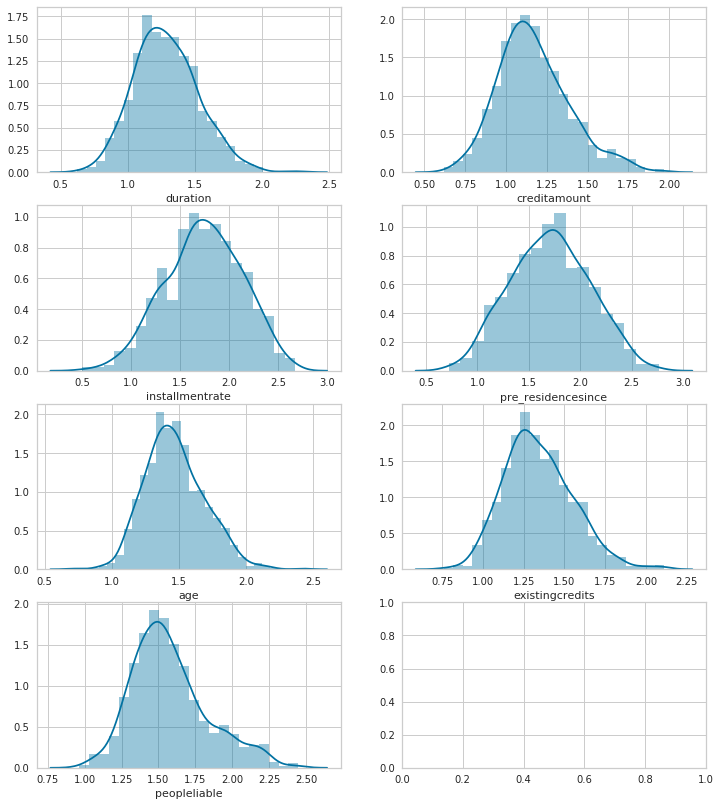

In [127]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( noise_df["duration"] , ax=axes[0, 0])
sns.distplot( noise_df["creditamount"] ,ax=axes[0, 1])
sns.distplot( noise_df["installmentrate"] , ax=axes[1, 0])
sns.distplot( noise_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( noise_df["age"] , ax=axes[2, 0])
sns.distplot( noise_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( noise_df["peopleliable"] , ax=axes[3, 0])
plt.savefig('nosie_dist.png')

In [128]:
X8 = noise_df.drop('classification', axis = 1)
y8 = noise_df['classification']

In [129]:
# %%time
data = pd.concat([X8, y8], axis=1)

n_iterations = 100

lr_data = []
lr_models = []
lr_data1 = []
lr_models1 = []

bootstrap_datas = []
bootstrap_mean = []
svm_data = []
svm_models = []
svm_data1 = []
svm_models1 = []

lr_df_train = []


In [130]:
n_size = int(len(data))

    
X_train = data.drop(['classification'],axis=1)
y_train = data['classification']

lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
try:
    lr.fit(X_train.drop(['index'],axis=1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = lr.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'lr_noise'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

lr_df_train=[_y_pred]

print('end')

end


In [131]:
svm_df_train=[]
try:
    svm_clf_8.fit(X_train.drop('index',axis = 1),y_train)
except:
    print(X_train.isna().sum()[X_train.isna().sum() >1])
    raise 'err'
_y_pred = svm_clf_8.predict(X_train.drop('index',axis = 1))
_y_pred = pd.DataFrame(list(zip(X_train['index'],_y_pred)),columns=['index',f'svm_noise'] ) 
_y_pred['index'] = _y_pred['index'].astype(int)

svm_df_train=[_y_pred]

print('end')

end


In [132]:
merge_df = y_pred.copy().reset_index().rename({0:'lr_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in lr_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
#     join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['lr_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['lr_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,lr_noise,153.000,23.000,21.000,603.000
1,mean,153.000,23.000,21.000,603.000
2,standard deviation,nan,nan,nan,nan


In [133]:
merge_df = y_pred2.copy().reset_index().rename({0:'svm_original'},axis=1)
# merge_df = y_pred.copy().rename({0:'lr_original'},axis=1)


cms = []
for _df in svm_df_train:
#     'left', 'right', 'outer', 'inner'
    join_df = merge_df.merge(_df,on='index', how='inner')
    ind  = join_df.duplicated('index')
#     join_df = join_df[ind]
    name =join_df.columns[-1]
    join_df['real'] = join_df['index'].apply(lambda x: norm_df['classification'].loc[x])
    tp  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==1)
    fn  = np.array(join_df['svm_original']==1) * np.array(join_df[_df.columns[-1]]==0)
    fp  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==1)
    tn  = np.array(join_df['svm_original']==0) * np.array(join_df[_df.columns[-1]]==0)
    cms += [np.array([name,sum(tp),sum(fp),sum(fn),sum(tn)])]
    
cms = np.array(cms)
cfm_df = pd.DataFrame(cms,columns=['name','tp','fp','fn','tn'])
cfm_df['tp'] = cfm_df['tp'].astype(float)
cfm_df['fn'] = cfm_df['fn'].astype(float)
cfm_df['fp'] = cfm_df['fp'].astype(float)
cfm_df['tn'] = cfm_df['tn'].astype(float)

cfm_df = cfm_df.append(
{
    "name":"mean",
    "tp":cfm_df['tp'].mean(),
    "fn":cfm_df['fn'].mean(),
    "fp":cfm_df['fp'].mean(),
    "tn":cfm_df['tn'].mean(),
},ignore_index=True)
cfm_df = cfm_df.append(
{
    "name":"standard deviation",
    "tp":cfm_df['tp'].iloc[:-1].std(),
    "fn":cfm_df['fn'].iloc[:-1].std(),
    "fp":cfm_df['fp'].iloc[:-1].std(),
    "tn":cfm_df['tn'].iloc[:-1].std(),
},ignore_index=True)
cfm_df


,name,tp,fp,fn,tn
0,svm_noise,147.000,28.000,34.000,591.000
1,mean,147.000,28.000,34.000,591.000
2,standard deviation,nan,nan,nan,nan


In [134]:
# Test error
svm = SVC(kernel='linear')
svm.fit(X8.iloc[:,1:], y8)
u_pred44 = svm.predict(X_test1)
accu44 = accuracy_score(y_test1, u_pred44)
print("accuracy_score : ",accu44)
cfm_44 = confusion_matrix(y_test1, u_pred44)
print (cfm_44)

accuracy_score :  0.69
[[138   0]
 [ 62   0]]


In [135]:
lr.fit(X8.iloc[:,1:],y8)
u_pred55 = lr.predict(X_test1)
accu55 = accuracy_score(y_test1, u_pred55)
print("accuracy_score : ",accu55)
cfm_55 = confusion_matrix(y_test1, u_pred55)
print (cfm_55)

accuracy_score :  0.69
[[138   0]
 [ 62   0]]
